In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../data/Train.csv")
test = pd.read_csv("../data/Test.csv")

### IMPUTATION FOR MISSING VALUES 

In [3]:
## OUT OF THE 4 CATEGORICAL COLUMNS ONLY "TOP_PACK" and "REGION" have missing values
train["TOP_PACK"] = train["TOP_PACK"].fillna(value= "None")
train["REGION"] = train["REGION"].fillna(value= "None")


test["TOP_PACK"] = test["TOP_PACK"].fillna(value= "None")
test["REGION"] = test["REGION"].fillna(value= "None")

## Filled the missing values with a new categorical value "None"

In [4]:
## ALMOST ALL THE NUMERICAL COLUMNS HAVE MISSING VALUES
## I FILL THE MISSING VALUES WITH A VALUE OF "0.0", you can use mean, median, mode values for this also (whichever works best)
for i in ['MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'FREQ_TOP_PACK']:
    train[i] = train[i].fillna(value = 0.0)
    test[i] = test[i].fillna(value = 0.0)

### CHURN VISUALIZATION

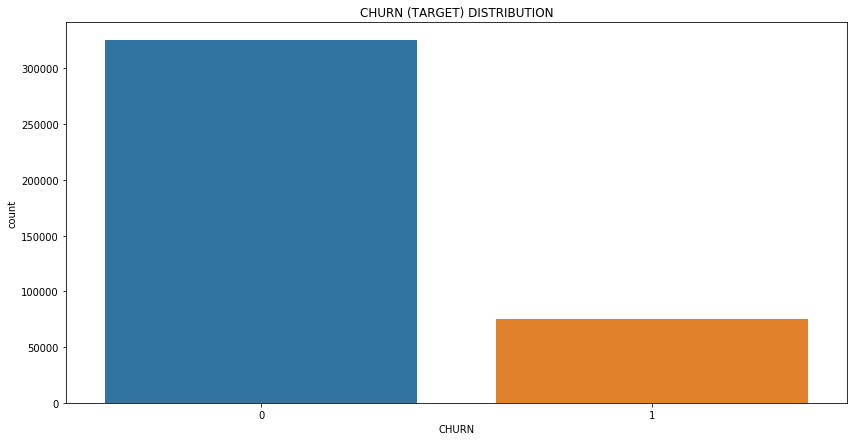

In [5]:
f, ax = plt.subplots(figsize=(14, 7))
plt.title("CHURN (TARGET) DISTRIBUTION")
sns.countplot(x="CHURN", data=train)

### OBSERVATIONS:
#### - This classification is "imbalanced"; meaning the class distribution of the target variable are not equal to each other
#### - We can also see from this distribution that less people are Churning from Expresso and more are retaining their services(Good news)

### CATEGORICAL COLUMNS VISUALIZATION

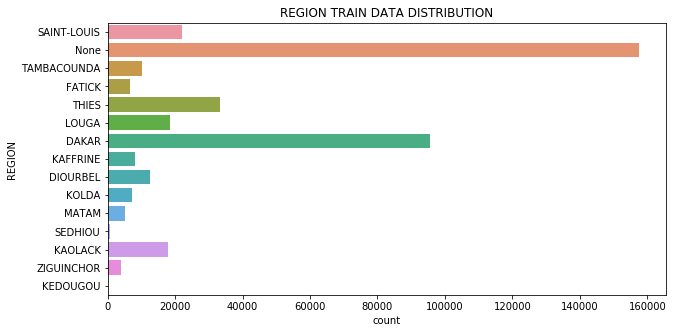

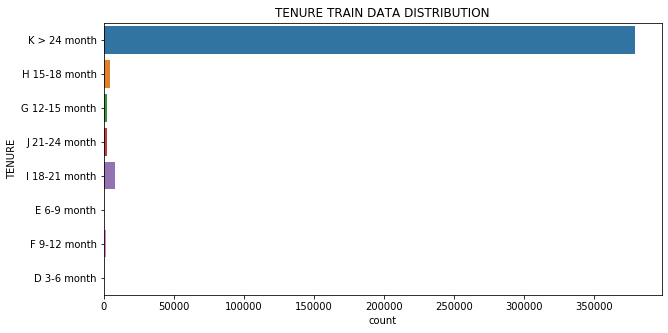

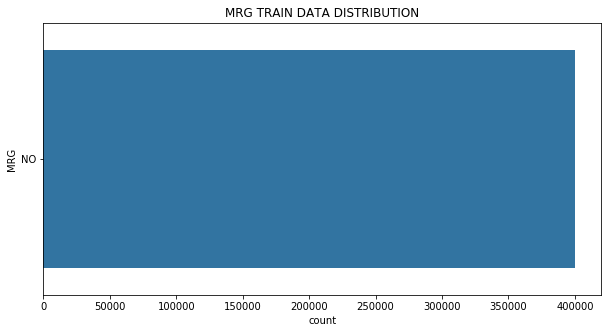

In [7]:
for cat_col in ["REGION", "TENURE", "MRG"]:
#     f, ax = plt.subplots(figsize=(14, 7))
    plt.figure(figsize=(10,5))
    plt.title(f"{cat_col} TRAIN DATA DISTRIBUTION")
    sns.countplot(y=cat_col, data=train)

### OBSERVATIONS:
#### - The "MRG" column is redundant since all its values/ rows "NO" are the same 
#### - The "TENURE" column has value "K > 24 month" has the most common tenure used with "6-9 month" and "3-6 month" less common
#### - The "REGION" column has value "DAKAR" has the most popular region, majority of the rows have missing values "None"
#### - The least popular regions are "SEDHIOU" and "KEDOUGOU"

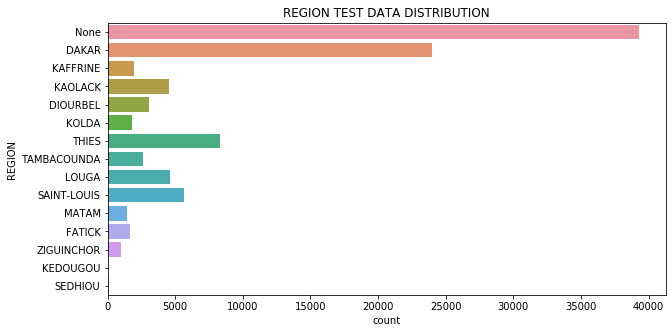

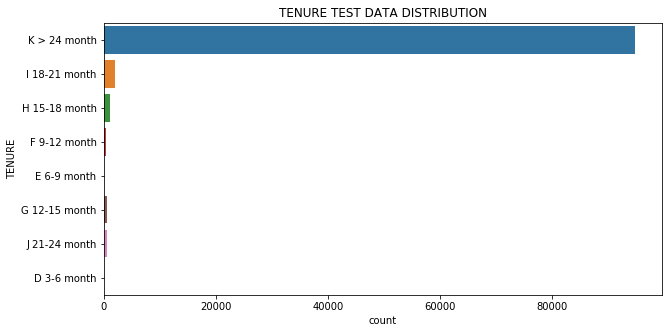

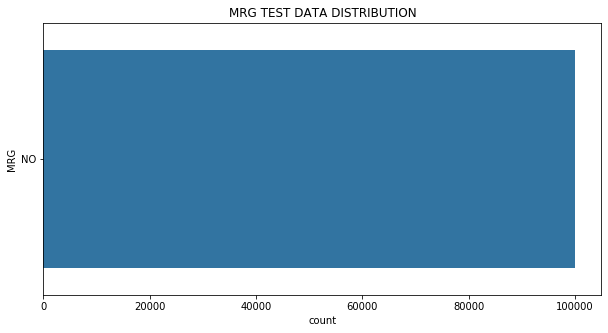

In [10]:
for cat_col in ["REGION", "TENURE", "MRG"]:
#     f, ax = plt.subplots(figsize=(14, 7))
    plt.figure(figsize=(10,5))
    plt.title(f"{cat_col} TEST DATA DISTRIBUTION")
    sns.countplot(y=cat_col, data=test)

### OBSERVATIONS:
#### - Similar distribution with the train data set

In [28]:
# f, ax = plt.subplots(figsize=(14, 7))
# sns.catplot(x="REGION", y="CHURN", kind="bar", data=train)
# sns.barplot(x="REGION", hue="CHURN", data=train)

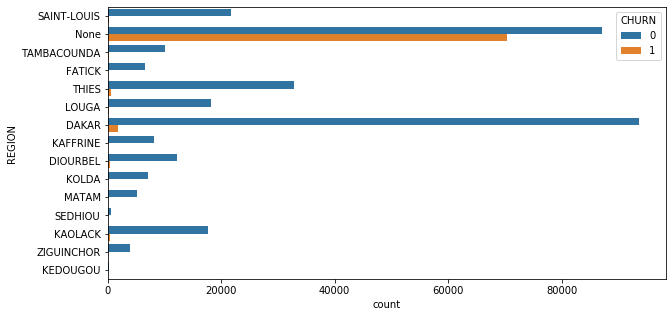

In [11]:
# f, ax = plt.subplots(figsize=(14, 7))
plt.figure(figsize=(10,5))
sns.countplot(y="REGION", hue = "CHURN", data=train)

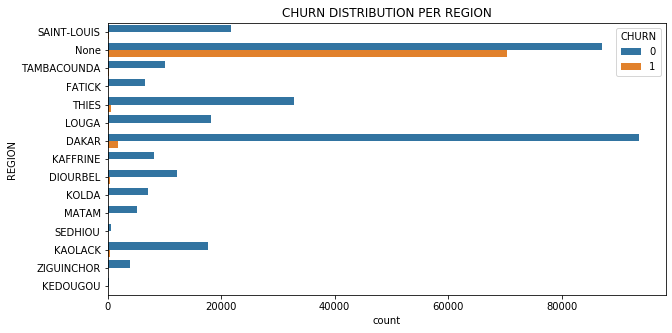

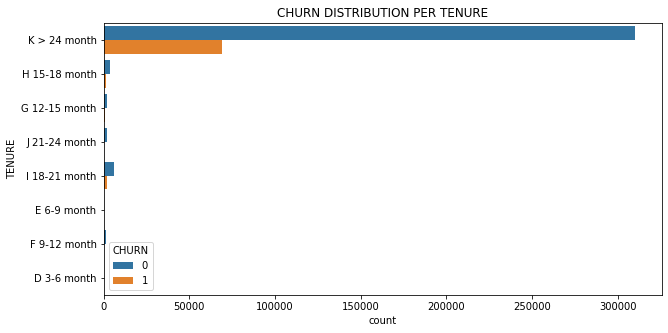

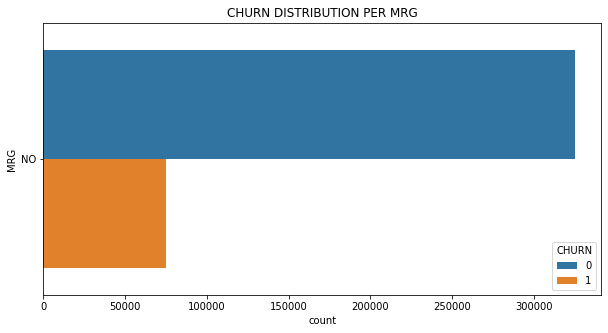

In [12]:
for cat_col in ["REGION", "TENURE", "MRG"]:
#     f, ax = plt.subplots(figsize=(14, 7))
    plt.figure(figsize=(10,5))
    plt.title(f"CHURN DISTRIBUTION PER {cat_col}")
    sns.countplot(y=cat_col, hue = "CHURN", data=train)

### OBSERVATION:
#### - Given the imbalanced nature of the "CHURN" (target) distribution, we can see the "CHURN" distribution in each Categorical Columns reflecting this 

### NUMERICAL COLUMNS VISUALIZATION

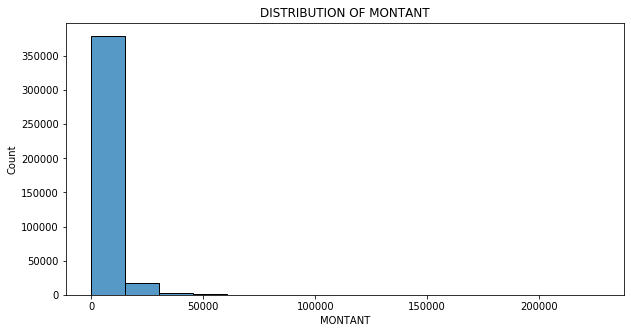

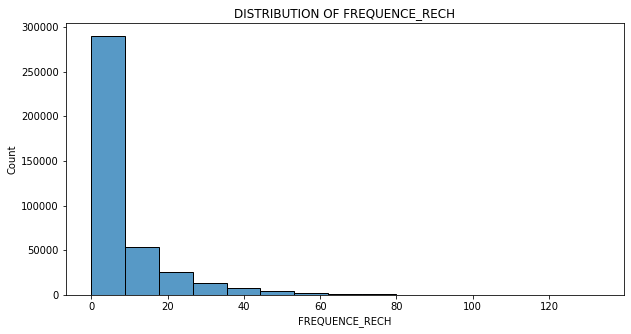

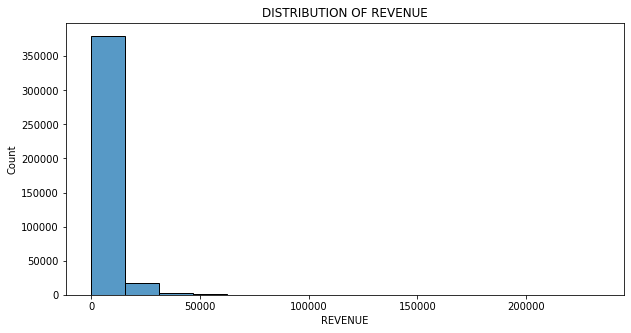

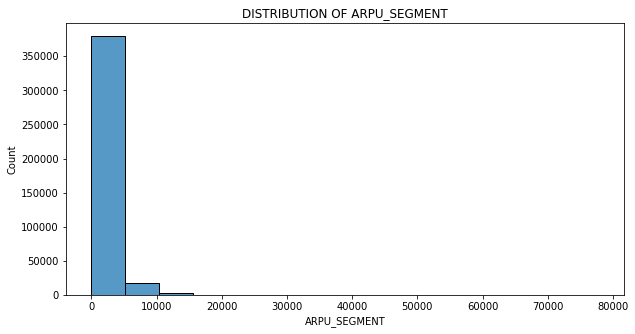

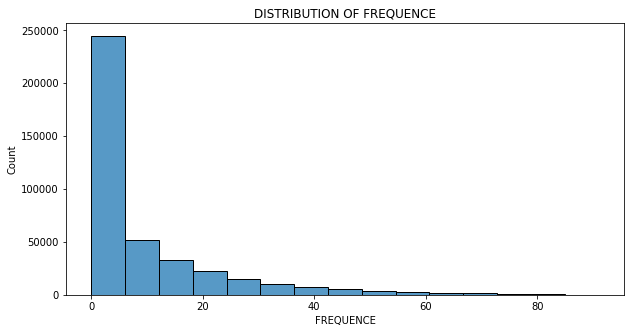

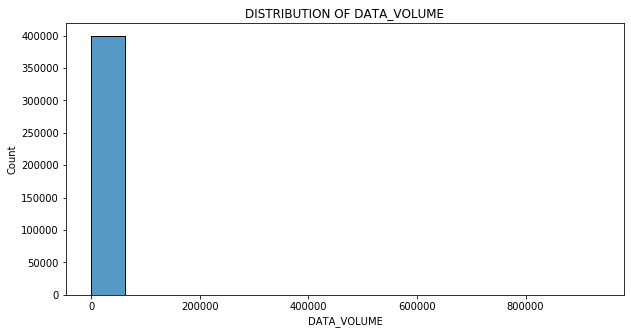

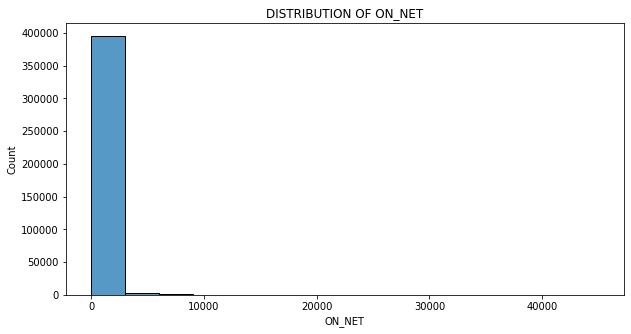

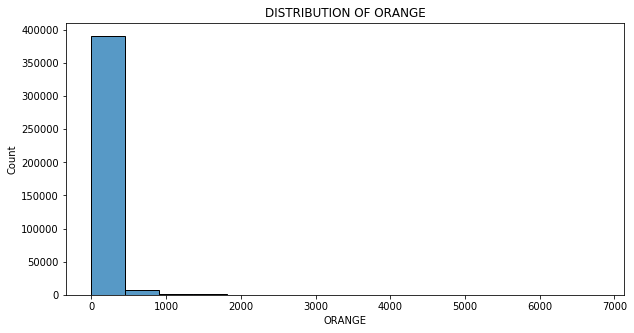

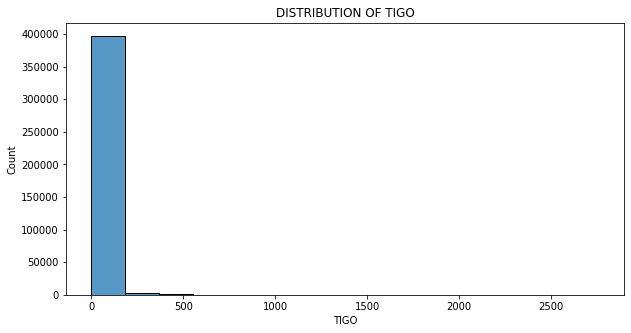

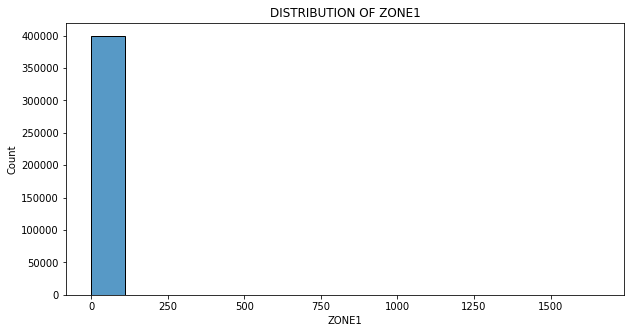

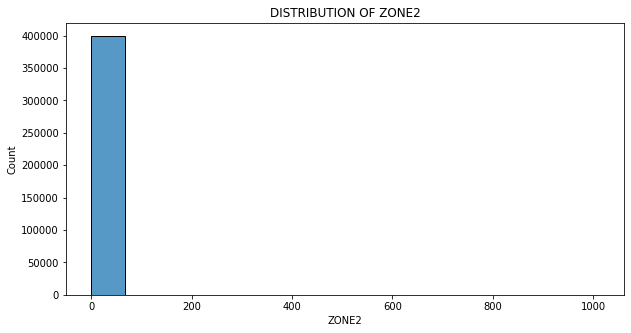

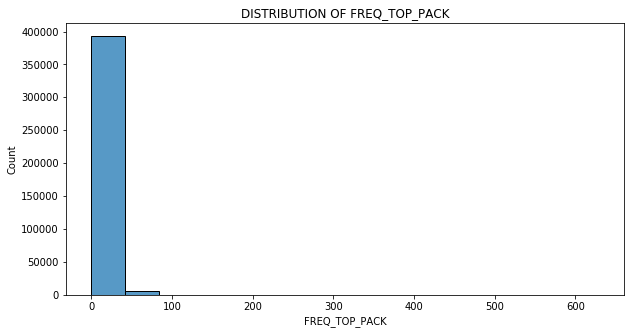

In [35]:
for num_col in ['MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'FREQ_TOP_PACK']:
    f, ax = plt.subplots(figsize=(10, 5))
#     plt.figure(figsize=(10,5))
    plt.title(f"DISTRIBUTION OF {num_col}")
    sns.histplot(data=train, x=num_col, bins =15)
#     sns.displot(data=train, x="REVENUE", kind="kde")

### OBSERVATION:
#### - The distribution of the all the Numerical columns values are *SKEWED*